Example of image compression with FFT.
Based on example from Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control, Brunton and Kutz, Chapter 6 Sec 2.
http://databookuw.com

(-0.5, 999.5, 1499.5, -0.5)

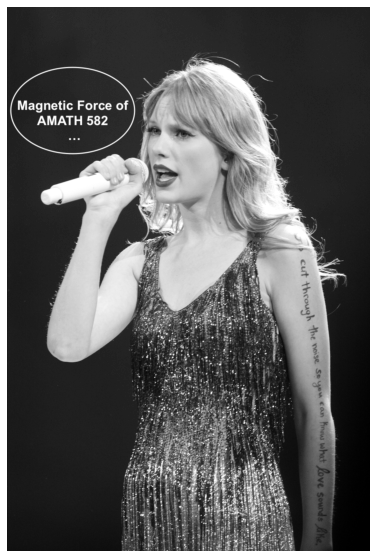

In [17]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os

from skimage import color

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

# Convert RGB to grayscale
A = imread('TS1.jpg')
B = color.rgb2gray(A)

# B = np.mean(A, -1); # Convert RGB to grayscale
plt.figure(figsize=(10,10))
plt.imshow(B,cmap='gray')
plt.axis('off')


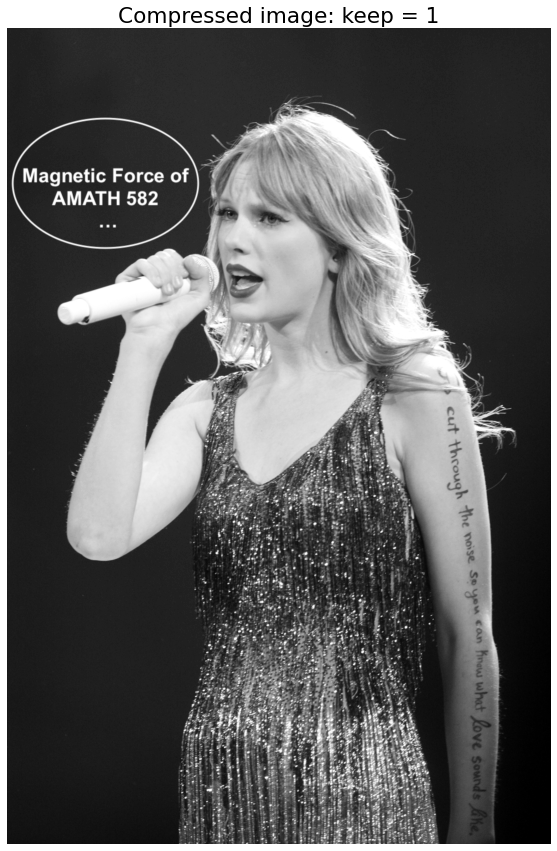

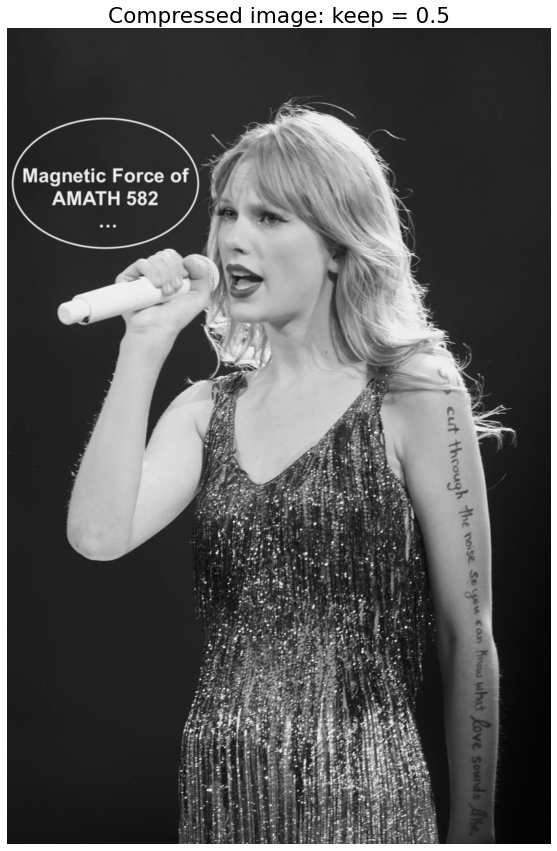

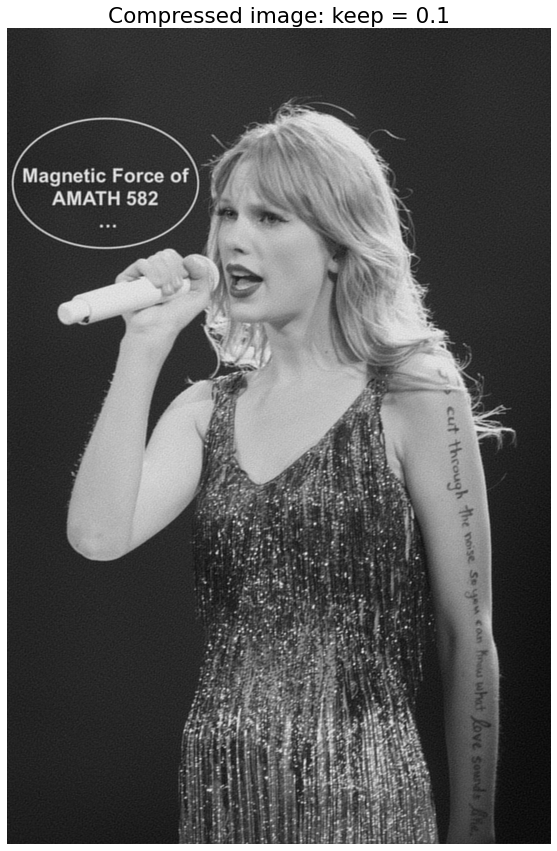

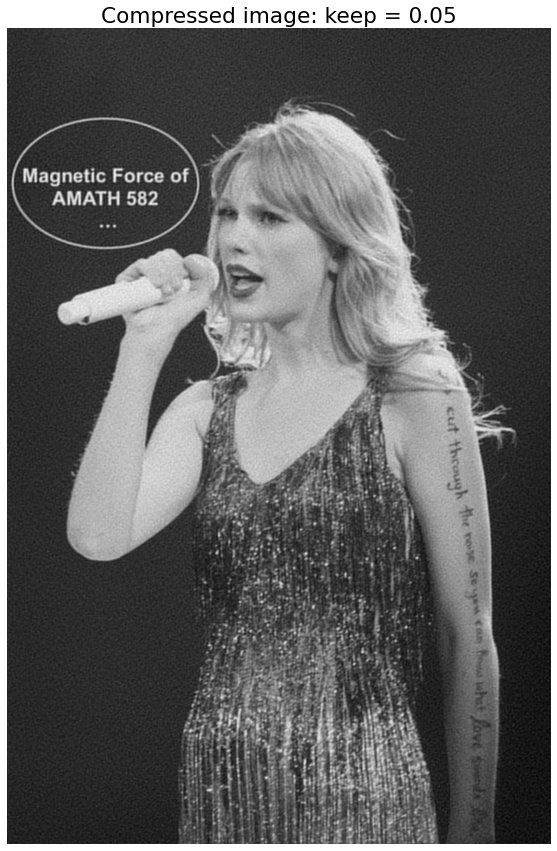

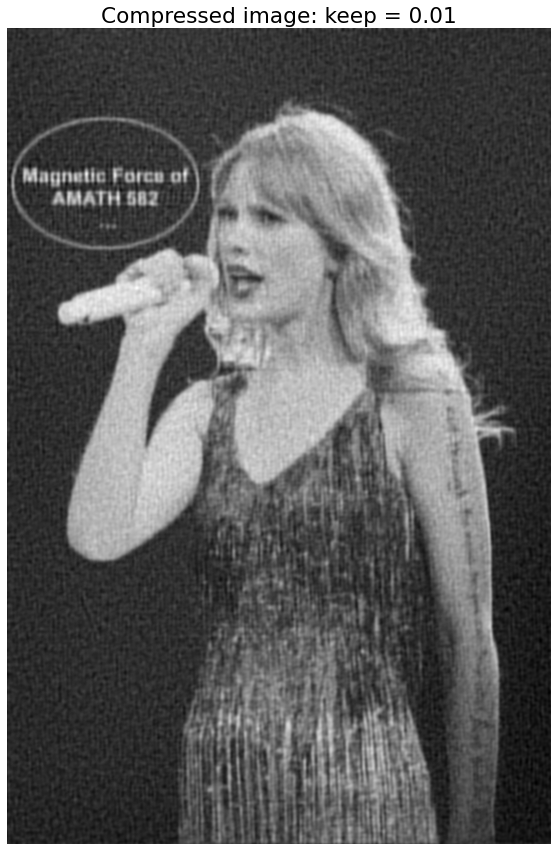

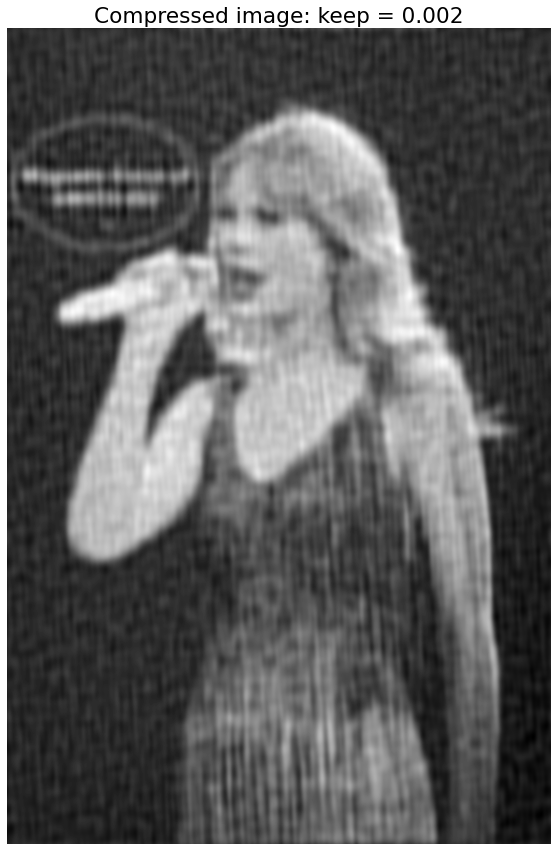

In [16]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (1, 0.5, 0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure(figsize=(15,15))
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))
    
